In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

import os

# Data preprocessing

In [2]:
# import dataset
liver = pd.read_csv('indian_liver_patient.csv')
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
liver.shape

(583, 11)

In [5]:
liver.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [6]:
liver=liver.drop_duplicates()
print(liver.shape)

(570, 11)


In [7]:
#Count Not a Number Values in Pandas DataFrame
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# Exploratory data analysis

1.   List item
2.   List item



<Axes: xlabel='Total_Bilirubin', ylabel='Direct_Bilirubin'>

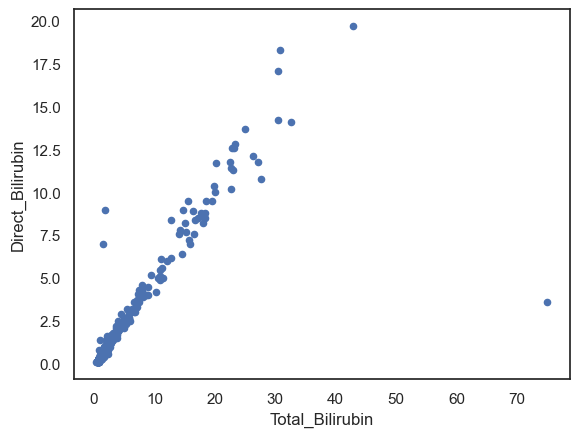

In [8]:
liver.plot(kind="scatter", x="Total_Bilirubin", y="Direct_Bilirubin")

<Axes: xlabel='Gender', ylabel='count'>

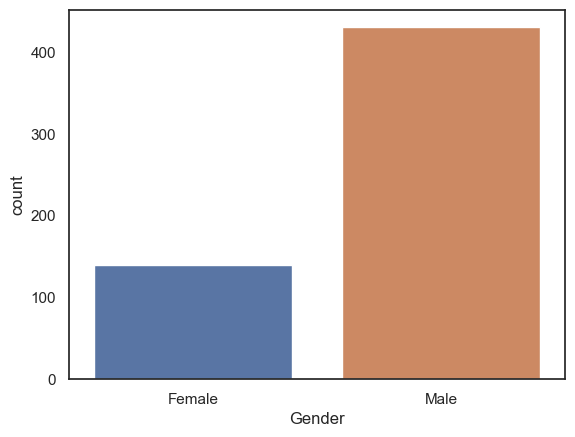

In [9]:
import seaborn as sns
sns.countplot(data = liver,x='Gender',label='count') #counts of observations in each categorical bin using bars

In [10]:
Male,Female=liver['Gender'].value_counts()
print('Number of patients that are male:',Male)
print('Number of patients that are female:',Female)

Number of patients that are male: 430
Number of patients that are female: 140


In [11]:
def label_disease(liver):
    if liver["Dataset"] == 1:
        return 'yes'
    return 'no'

liver['HasDisease'] = liver.apply(lambda liver: label_disease(liver), axis=1)

In [12]:
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,no
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,yes
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,yes
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,yes


In [13]:
liver['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 570, dtype: int64

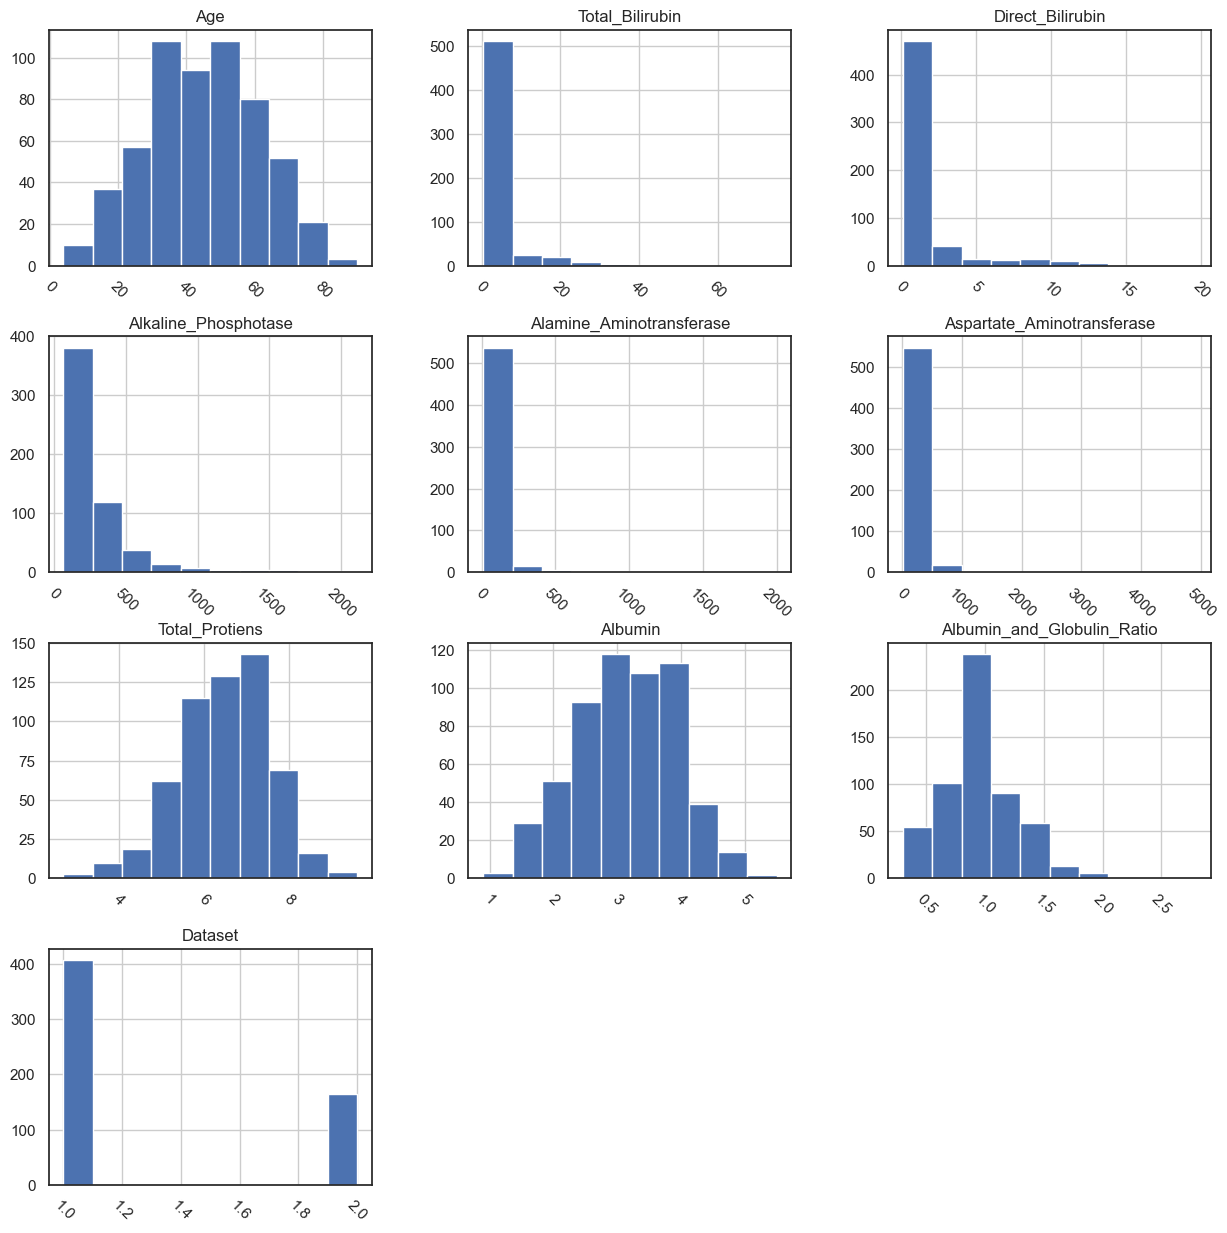

In [14]:
# Plot histogram grid
liver.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [15]:
liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<Axes: xlabel='count', ylabel='Gender'>

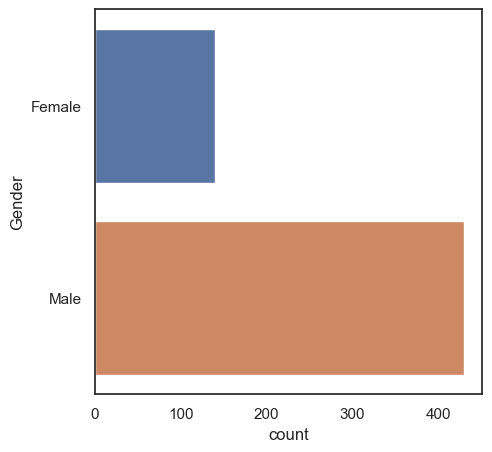

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=liver)

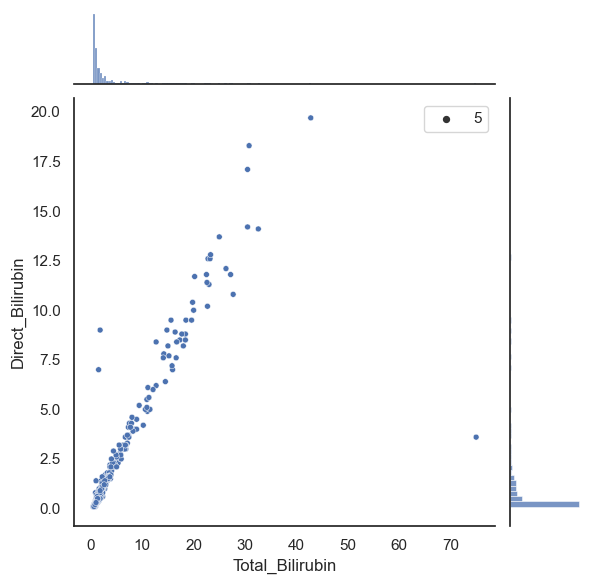

In [17]:
sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=liver, size=5)

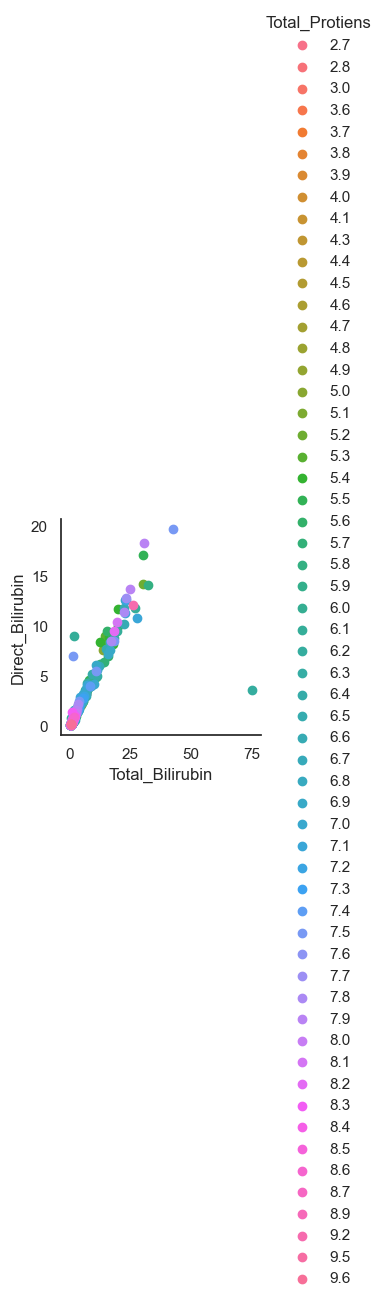

In [18]:
sns.FacetGrid(liver, hue="Total_Protiens")\
   .map(plt.scatter, "Total_Bilirubin", "Direct_Bilirubin")\
   .add_legend()

<Axes: xlabel='Total_Protiens', ylabel='Direct_Bilirubin'>

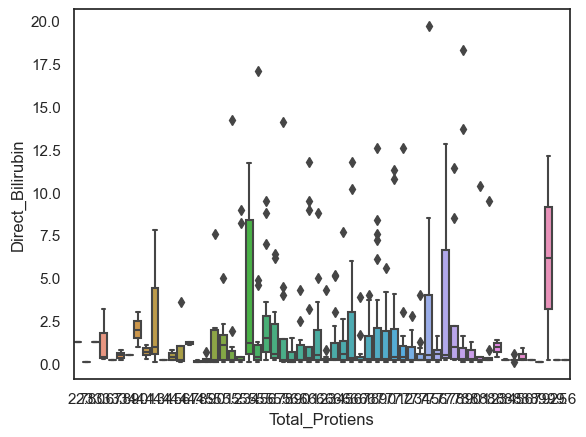

In [19]:
sns.boxplot(x="Total_Protiens", y="Direct_Bilirubin", data=liver)

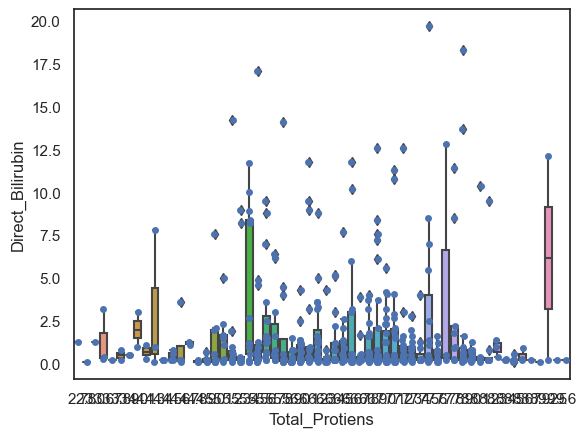

In [20]:
ax = sns.boxplot(x="Total_Protiens", y="Direct_Bilirubin", data=liver)
ax = sns.stripplot(x="Total_Protiens", y="Direct_Bilirubin", data=liver, jitter=True, edgecolor="gray")

<Axes: xlabel='Total_Protiens', ylabel='Direct_Bilirubin'>

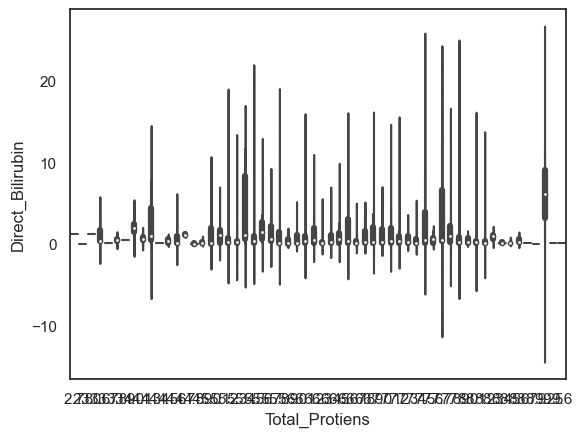

In [21]:
sns.violinplot(x="Total_Protiens", y="Direct_Bilirubin", data=liver, size=6)

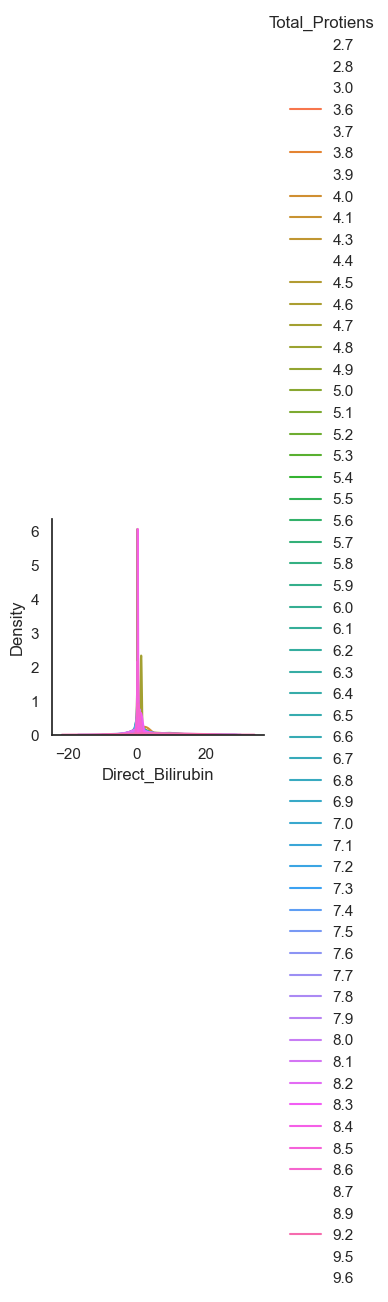

In [22]:
sns.FacetGrid(liver, hue="Total_Protiens")\
   .map(sns.kdeplot, "Direct_Bilirubin")\
   .add_legend()

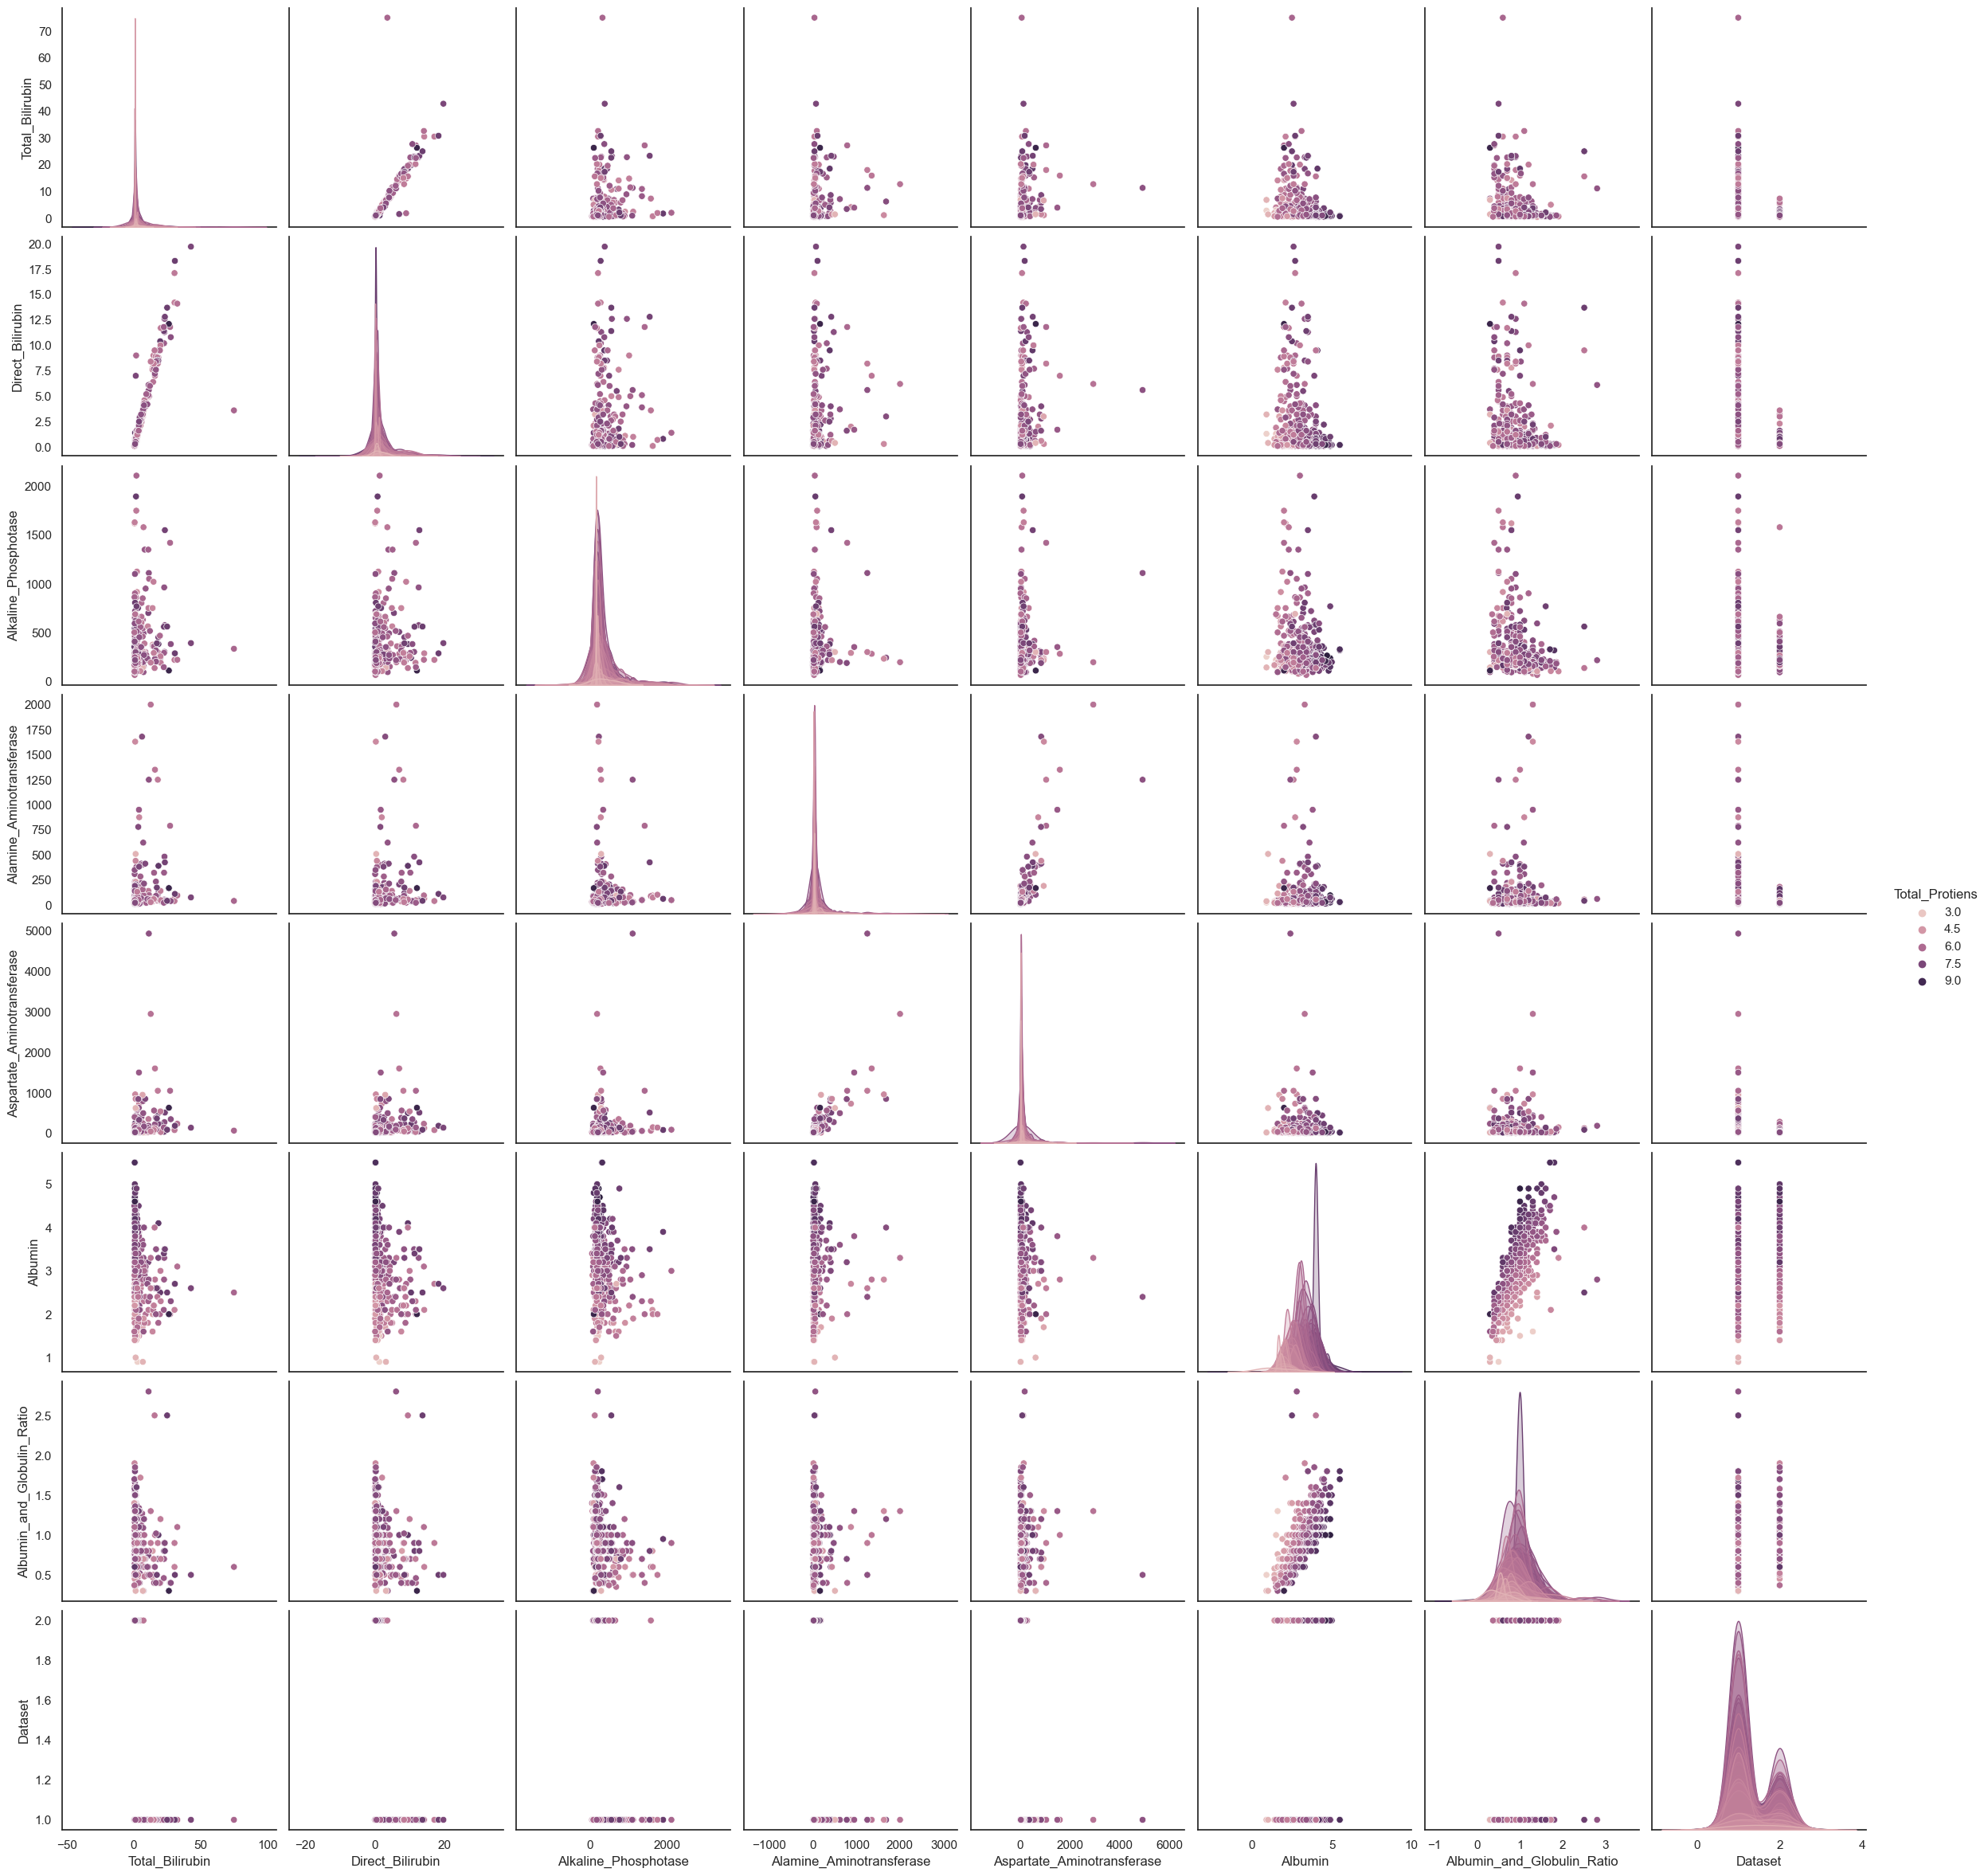

In [23]:
sns.pairplot(liver.drop("Age", axis=1), hue="Total_Protiens", size=3)

In [24]:
liver.corr() # correlation of each column in a DataFrame

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.197052,-0.271170,-0.215967,-0.138093
Total_Bilirubin,0.011500,1.000000,0.874116,0.206239,0.217471,0.238678,-0.008588,-0.224124,-0.207740,-0.224430
Direct_Bilirubin,0.007050,0.874116,1.000000,0.234609,0.237450,0.258489,-0.000875,-0.230751,-0.201519,-0.250666
Alkaline_Phosphotase,0.081673,0.206239,0.234609,1.000000,0.126830,0.167230,-0.030048,-0.168318,-0.236251,-0.187560
Alamine_Aminotransferase,-0.083383,0.217471,0.237450,0.126830,1.000000,0.791857,-0.035193,-0.027973,-0.006525,-0.161917
Aspartate_Aminotransferase,-0.016753,0.238678,0.258489,0.167230,0.791857,1.000000,-0.022000,-0.085180,-0.072899,-0.151101
Total_Protiens,-0.197052,-0.008588,-0.000875,-0.030048,-0.035193,-0.022000,1.000000,0.784731,0.234576,0.037794
Albumin,-0.271170,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.784731,1.000000,0.687438,0.166835
Albumin_and_Globulin_Ratio,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402
Dataset,-0.138093,-0.224430,-0.250666,-0.187560,-0.161917,-0.151101,0.037794,0.166835,0.171402,1.000000


<Axes: >

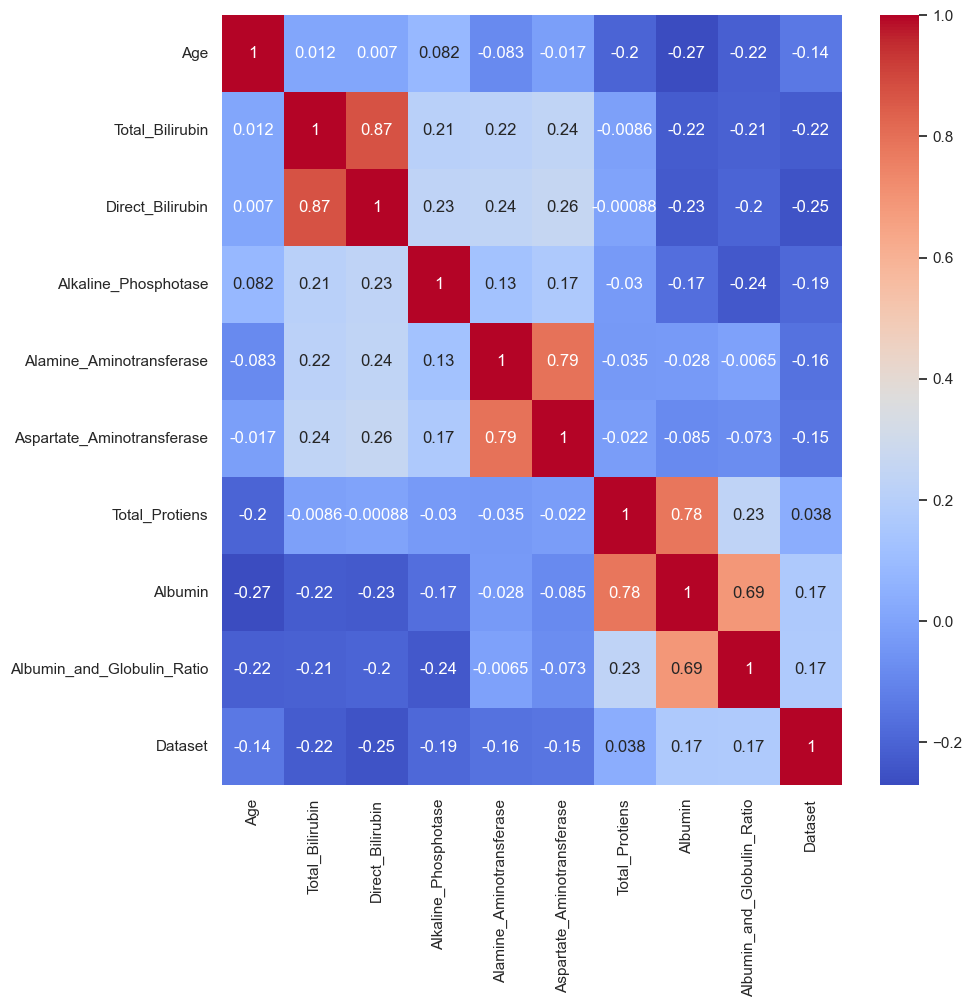

In [25]:
corr = liver.corr()
fig, ax = plt.subplots(figsize =(10,10))
sns.heatmap(corr, annot = True,ax = ax,cmap = 'coolwarm')

In [26]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [27]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,yes


In [28]:
liver['HasDisease'].value_counts()



yes    406
no     164
Name: HasDisease, dtype: int64

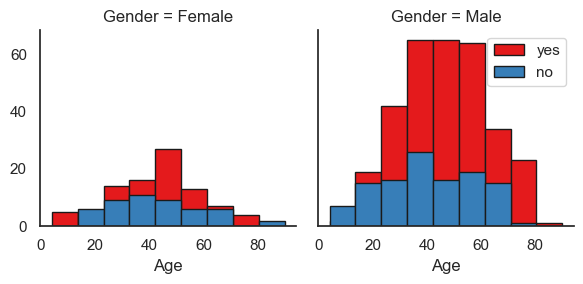

In [29]:
import seaborn as sns
bins = np.linspace(liver.Age.min(), liver.Age.max(),10)
grids = sns.FacetGrid(liver, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Age', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

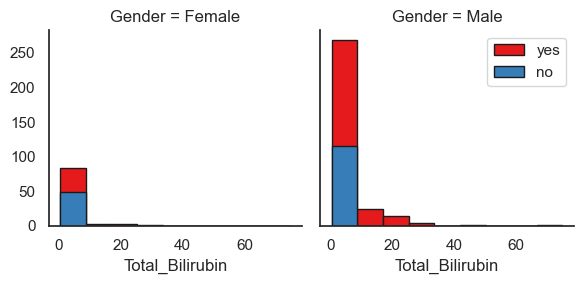

In [30]:
bins = np.linspace(liver.Total_Bilirubin.min(), liver.Total_Bilirubin.max(),10)
grids = sns.FacetGrid(liver, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Bilirubin', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

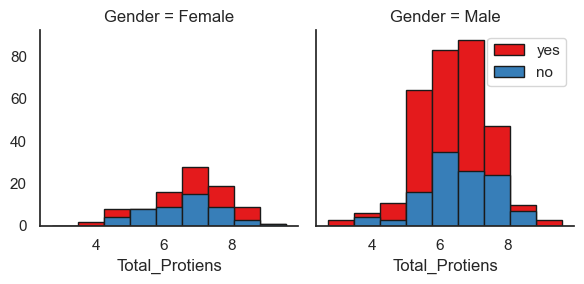

In [31]:
bins = np.linspace(liver.Total_Protiens.min(), liver.Total_Protiens.max(),10)
grids = sns.FacetGrid(liver, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Protiens', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

In [32]:
liver['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)


In [33]:
liver.isna().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
HasDisease                    0
dtype: int64

In [34]:

liver['Albumin_and_Globulin_Ratio'].fillna((liver['Albumin_and_Globulin_Ratio'].mean()), inplace=True)


In [35]:
Feature = liver[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]


In [36]:
X = Feature
y = liver['HasDisease'].values
y[0:5]

array(['yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [38]:
X = liver.iloc[:, :-1].values
Y = liver.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=62)

In [39]:
print(X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(570, 11) (570,) (427, 11) (143, 11) (427,) (143,)


# LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        37
         yes       1.00      1.00      1.00       106

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

[[ 37   0]
 [  0 106]]
accuracy is 1.0


# K Nearest Neighbour

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

          no       0.40      0.46      0.43        37
         yes       0.80      0.76      0.78       106

    accuracy                           0.69       143
   macro avg       0.60      0.61      0.61       143
weighted avg       0.70      0.69      0.69       143

[[17 20]
 [25 81]]
accuracy is 0.6853146853146853


# Support Vector Machine

In [42]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00        37
         yes       0.74      1.00      0.85       106

    accuracy                           0.74       143
   macro avg       0.37      0.50      0.43       143
weighted avg       0.55      0.74      0.63       143

[[  0  37]
 [  0 106]]
accuracy is 0.7412587412587412


# RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        37
         yes       1.00      1.00      1.00       106

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

[[ 37   0]
 [  0 106]]
accuracy is 1.0
